In [1]:
import numpy as np
import skimage 
# from skimage import io 

In [3]:
import tensorflow as tf

In [4]:
import keras 

Using TensorFlow backend.


In [5]:
from skimage import io 
def show(img):
    io.imshow(img)
    io.show()

### Notes :

- Code a custom Neural Network and classify some dataset 
- Discussed: Categorical Cross Entropy
- Discussed: Activation Funcitions
- Discussed: Saving the model weights and Config 
- Discussed:

In [6]:
from tqdm import tqdm 
from keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
# So we have 28x28 images 
x_train[0].shape

(28, 28)

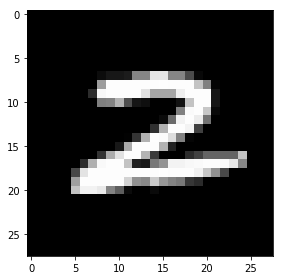

In [9]:
show(x_train[199])

In [10]:
from keras.utils import np_utils

### One Hot encoding 

In [11]:
y_test_oh = np_utils.to_categorical(y_test)
y_train_oh = np_utils.to_categorical(y_train)

In [12]:
y_test[0] , y_test_oh[0]

(7, array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]))

### In classification problems establishing a baseline is important

10 classes , 10percent accuracy. 


In [13]:
### Talked about Random Initializers 

from matplotlib import pyplot as plt
# x = np.random.rand(100)
# plt.plot()
# plt.show()


In [14]:
from keras.models import Sequential
from keras import backend as k 

from keras.layers import Dense

In [15]:
28 **2

784

In [21]:
# ::: First Layer :::
# 
# 784 inpur dimensions flattened image. 
# dotproduct = dot(Wx) 
# bias_added_dotproduct = dotproduct + b
#
#
# def reluact(x):
# return max(0,x)
#
# activation = reluact(bias_added_dotproduct)
#
#
numclasses = 10
EPOCHS = 30
BATCHSIZE = 32

hlayer1 = Dense(5,input_shape=(784,))
# hlayer2 = Dense(3)
outlayer = Dense(numclasses , activation='softmax')

In [22]:
from keras import activations

In [23]:
model = Sequential()
model.add(hlayer1)
# model.add(hlayer2)
model.add(outlayer)

In [24]:
#(784 * 5) + 5
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 3925      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [25]:
from keras.optimizers import adam

In [26]:
optimzer_of_my_choice = adam(lr=0.001)
model.compile(optimzer_of_my_choice , loss='categorical_crossentropy' , metrics=['accuracy'])

### Remember to flatten samples !

In [27]:
x_train_sravelled = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] * x_train.shape[2] ) )
x_test_sravelled = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] * x_test.shape[2] ) )


### Added a Callback !
- Validation Data Split and discussion on training mechanisms 
- callbacks explored 

In [29]:
from keras.callbacks import TensorBoard
tbcallback = TensorBoard(log_dir='./logs')

In [30]:
history = model.fit(x_train_sravelled , y_train_oh, 
          batch_size=BATCHSIZE, epochs=EPOCHS, 
          verbose=1, 
          callbacks=[tbcallback],  ##
          validation_split=0.2,  
          validation_data=None, 
          shuffle=True, 
          class_weight=None, 
          sample_weight=None, 
          initial_epoch=0, 
         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 4s - loss: 7.8055 - acc: 0.5052 - val_loss: 4.8908 - val_acc: 0.6838
Epoch 2/30
48000/48000 [==============================] - 3s - loss: 4.0283 - acc: 0.7394 - val_loss: 3.0318 - val_acc: 0.8008
Epoch 3/30
48000/48000 [==============================] - 3s - loss: 2.8791 - acc: 0.8096 - val_loss: 2.6598 - val_acc: 0.8252
Epoch 4/30
48000/48000 [==============================] - 3s - loss: 2.6279 - acc: 0.8254 - val_loss: 2.3694 - val_acc: 0.8403
Epoch 5/30
48000/48000 [==============================] - 3s - loss: 2.4534 - acc: 0.8367 - val_loss: 2.2722 - val_acc: 0.8460
Epoch 6/30
48000/48000 [==============================] - 3s - loss: 2.3440 - acc: 0.8430 - val_loss: 2.3335 - val_acc: 0.8414
Epoch 7/30
48000/48000 [==============================] - 3s - loss: 2.2465 - acc: 0.8467 - val_loss: 2.1439 - val_acc: 0.8508
Epoch 8/30
48000/48000 [==============================] - 3s 

In [31]:
evalloss, testAccuracy = model.evaluate(x_test_sravelled,y_test_oh)

print "\nTest accuracy :" , testAccuracy

 9344/10000 [===========================>..] - ETA: 0s
Test accuracy 0.8855


In [33]:
evalloss

1.6430725292472577

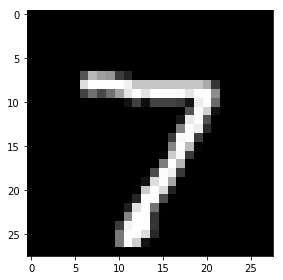

1/1 [==============================] - 0s
Predicted Label:  [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
Predicted Label:  [7]
Truth labels : 7


In [65]:
tmp = x_test_sravelled[0].reshape((28,28))

show(tmp)

prob = model.predict(x_test_sravelled[0:1])
predc = model.predict_classes(x_test_sravelled[0:1])

print "Predicted Label: ", max(prob)
print "Predicted Label: ", predc
print "Truth labels :", np.argmax(y_test_oh[0])
# model.evaluate(x_test_sravelled,y_test_oh)

### Exploring High Dimensional Data through T-SNE

In [34]:
from sklearn.manifold import TSNE

In [48]:
embeddingModel = TSNE(n_components=2, perplexity=30.0, early_exaggeration=4.0, learning_rate=1000.0,
                      n_iter=1000, n_iter_without_progress=30, min_grad_norm=1e-07, 
                      metric='euclidean', init='random', verbose=1, 
                      random_state=None, method='barnes_hut', angle=0.5)

In [49]:
out=embeddingModel.fit_transform(x_train_sravelled[:1000],y_train_oh[:1000])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 523.009441
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.924966
[t-SNE] Error after 175 iterations: 0.924966


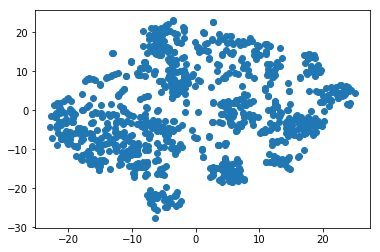

In [51]:
plt.scatter(out[:,0] , out[:,1])
plt.show()
